In [33]:
pip install pandas


Note: you may need to restart the kernel to use updated packages.


In [34]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [35]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [7]:
pip install scikit-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 2.8 MB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [45]:

csv_file_path = '/home/michele/Desktop/Tirocinio_giusto/Tirocinio/post_seconda_revisione/dati.csv'
csv_file_path1 = '/home/michele/Desktop/Tirocinio_giusto/Tirocinio/post_seconda_revisione/dati_ottimizzato.csv'
csv_file_path5 = '/home/michele/Desktop/Tirocinio_giusto/Tirocinio/post_seconda_revisione/dati_differences_upd2.csv'
#file below ("..._1") have fixed q (127) and variable matrix dimensionss
csv_file_path7 = '/home/michele/Desktop/Tirocinio_giusto/Tirocinio/post_seconda_revisione/dati_differences_upd_only_count_ord_final_1.csv'
csv_file_path8 = '/home/michele/Desktop/Tirocinio_giusto/Tirocinio/post_terza_revisione/dati.csv'
#file sandbox
csv_file_path9 = '/home/michele/Desktop/Tirocinio_giusto/Tirocinio/post_seconda_revisione/dati_26_11.csv'
csv_file_path10 = '/home/michele/Desktop/Tirocinio_giusto/Tirocinio/post_terza_revisione/dati_26_11.csv'

df = pd.read_csv(csv_file_path)
df1 = pd.read_csv(csv_file_path1)
df5 = pd.read_csv(csv_file_path5)
df7 = pd.read_csv(csv_file_path7)
df8 = pd.read_csv(csv_file_path8)
df9 = pd.read_csv(csv_file_path9)
df10 = pd.read_csv(csv_file_path10)

print(df)
print(df1)
print(df5)
print(df7)

      File  Iteration  Max_columns  Duration_w_all_Columns  \
0        4          0           11                0.999672   
1        4          1           11                0.889635   
2        4          2           11                0.905284   
3        4          3           11                1.101511   
4        4          4           11               26.689489   
...    ...        ...          ...                     ...   
1972     4        995           12                0.791604   
1973     4        996           12                0.767877   
1974     4        997           12                0.919629   
1975     4        998           12                1.798177   
1976     4        999           12                0.788121   

      Duration_w_max_columns  Num_op_w_all_columns  Num_op_w_max_columns  
0                   2.386908                     0                     0  
1                   0.834656                     0                     0  
2                   0.758730  

In [46]:
df_appended = pd.concat([df, df1, df8], ignore_index=True)
print(df_appended)

      File  Iteration  Max_columns  Duration_w_all_Columns  \
0        4          0           11                0.999672   
1        4          1           11                0.889635   
2        4          2           11                0.905284   
3        4          3           11                1.101511   
4        4          4           11               26.689489   
...    ...        ...          ...                     ...   
7945     5        995           12                0.749240   
7946     5        996           12                0.676096   
7947     5        997           12                0.772074   
7948     5        998           12                0.676734   
7949     5        999           12                0.674305   

      Duration_w_max_columns  Num_op_w_all_columns  Num_op_w_max_columns  
0                   2.386908                     0                     0  
1                   0.834656                     0                     0  
2                   0.758730  

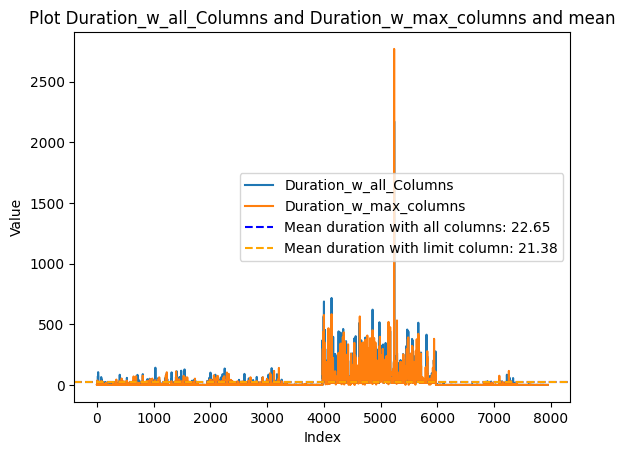

In [47]:
#lascia il tempo che trova
mean_w_all_cols = df_appended['Duration_w_all_Columns'].mean()
mean_w_max_cols = df_appended['Duration_w_max_columns'].mean()

plt.plot(df_appended.index, df_appended['Duration_w_all_Columns'], label='Duration_w_all_Columns')
plt.plot(df_appended.index, df_appended['Duration_w_max_columns'], label='Duration_w_max_columns')

plt.axhline(y=mean_w_all_cols, color='blue', linestyle='--', label=f'Mean duration with all columns: {mean_w_all_cols:.2f}')
plt.axhline(y=mean_w_max_cols, color='orange', linestyle='--', label=f'Mean duration with limit column: {mean_w_max_cols:.2f}')

plt.title('Plot Duration_w_all_Columns and Duration_w_max_columns and mean')
plt.legend()
plt.xlabel('Index')
plt.ylabel('Value')

plt.show()

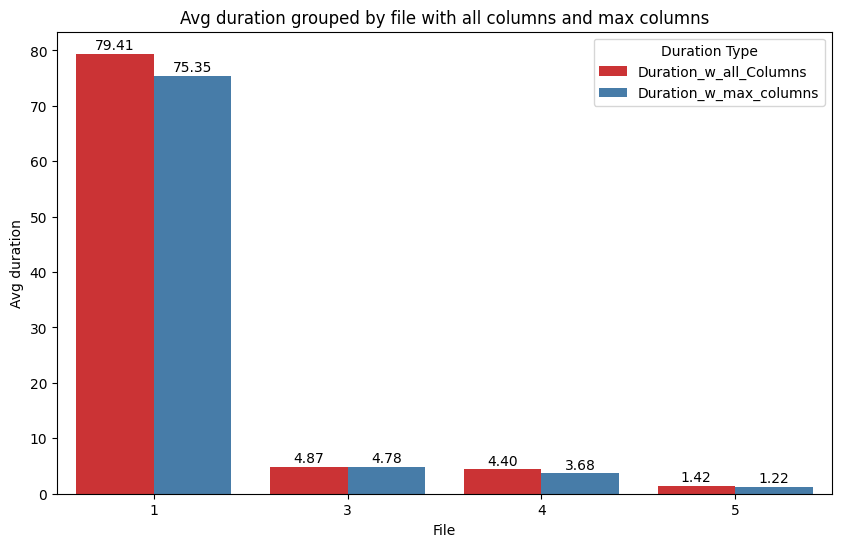

In [48]:
#NON HA SENSO METTERE PURE IL FILE 5 POICHÈ È UN'ALTRA FC --> NON È UN OTTIMIZZAZIONE E QUINDI NON MI SERVE IL CONFRONTO
grouped_means = df_appended.groupby('File').agg({
    'Duration_w_all_Columns': 'mean',
    'Duration_w_max_columns': 'mean'
}).reset_index()

grouped_means_melted = grouped_means.melt(id_vars='File', 
                                          value_vars=['Duration_w_all_Columns', 'Duration_w_max_columns'], 
                                          var_name='Durata_Type', value_name='Mean')

plt.figure(figsize=(10, 6))

ax = sns.barplot(data=grouped_means_melted, x='File', y='Mean', hue='Durata_Type', palette='Set1')
plt.title('Avg duration grouped by file with all columns and max columns')
plt.xlabel('File')
plt.ylabel('Avg duration')

plt.legend(title='Duration Type')

for p in ax.patches:
    if p.get_height() > 0:
        ax.annotate(format(p.get_height(), '.2f'), 
                        (p.get_x() + p.get_width() / 2., p.get_height()), 
                        ha='center', va='bottom', 
                        fontsize=10, color='black', 
                        xytext=(0, 1), 
                        textcoords='offset points')

plt.show()

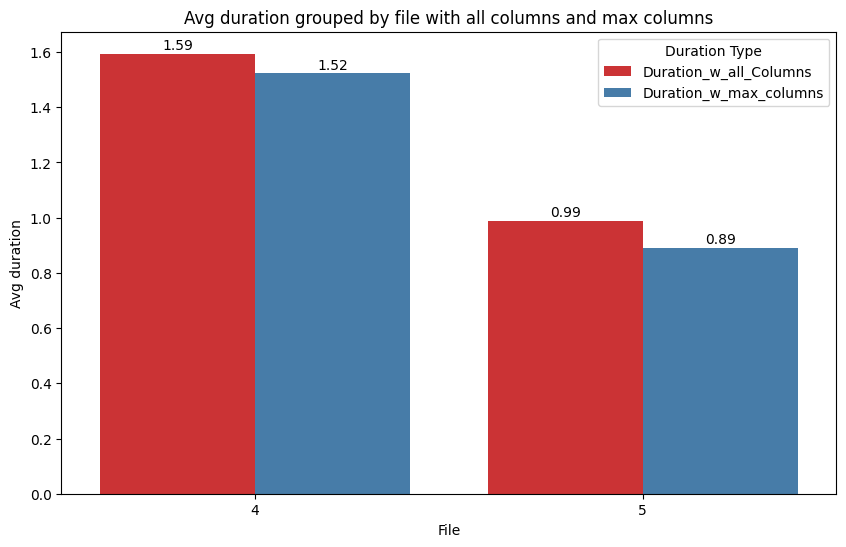

In [49]:
df_appended_sandbox = pd.concat([df9, df10], ignore_index=True)
grouped_means_sandbox = df_appended_sandbox.groupby('File').agg({
    'Duration_w_all_Columns': 'mean',
    'Duration_w_max_columns': 'mean'
}).reset_index()

grouped_means_melted_sanbox = grouped_means_sandbox.melt(id_vars='File', 
                                          value_vars=['Duration_w_all_Columns', 'Duration_w_max_columns'], 
                                          var_name='Durata_Type', value_name='Mean')

plt.figure(figsize=(10, 6))

ax = sns.barplot(data=grouped_means_melted_sanbox, x='File', y='Mean', hue='Durata_Type', palette='Set1')
plt.title('Avg duration grouped by file with all columns and max columns')
plt.xlabel('File')
plt.ylabel('Avg duration')

plt.legend(title='Duration Type')

for p in ax.patches:
    if p.get_height() > 0:
        ax.annotate(format(p.get_height(), '.2f'), 
                        (p.get_x() + p.get_width() / 2., p.get_height()), 
                        ha='center', va='bottom', 
                        fontsize=10, color='black', 
                        xytext=(0, 1), 
                        textcoords='offset points')

plt.show()


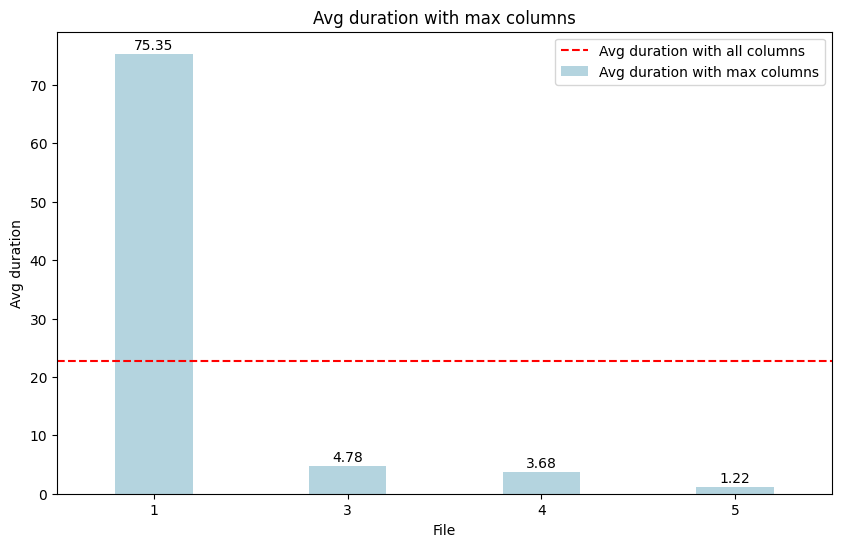

In [50]:
mean_w_all_cols = df_appended['Duration_w_all_Columns'].mean()

grouped_means = df_appended.groupby('File').agg({
    'Duration_w_max_columns': 'mean'
}).reset_index()

grouped_means['Mean_Global'] = mean_w_all_cols

plt.figure(figsize=(10, 6))
plt.axhline(y=mean_w_all_cols, color='red', linestyle='--', label='Avg duration with all columns')
barplot = sns.barplot(data=grouped_means, x='File', y='Duration_w_max_columns', color='lightblue', width=0.4, label='Avg duration with max columns')

plt.title('Avg duration with max columns')
plt.xlabel('File')
plt.ylabel('Avg duration')
plt.xticks(ticks=range(len(grouped_means)), labels=grouped_means['File'], rotation=0)  # Modifica rotation se necessarioplt.legend()
plt.legend(loc='upper right')

for p in barplot.patches:
    barplot.annotate(format(p.get_height(), '.2f'), 
                     (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha='center', va='bottom', 
                     fontsize=10, color='black', 
                     xytext=(0, 1), 
                     textcoords='offset points')

plt.show()

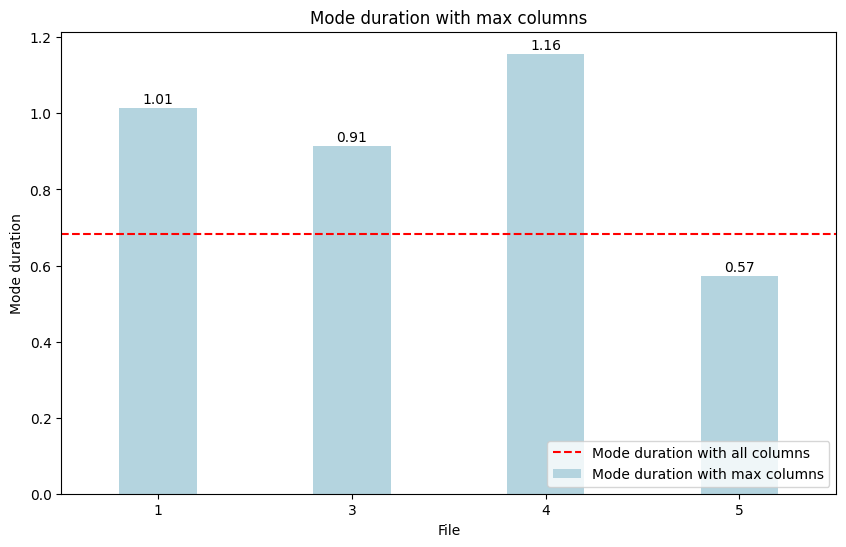

In [51]:
mode_w_all_cols = df_appended['Duration_w_all_Columns'].mode().iloc[0] if not df_appended['Duration_w_all_Columns'].mode().empty else None

grouped_modes = df_appended.groupby('File').agg({
    'Duration_w_max_columns': lambda x: x.mode().iloc[0] if not x.mode().empty else None
}).reset_index()

grouped_modes['Mode_Global'] = mode_w_all_cols

plt.figure(figsize=(10, 6))

plt.axhline(y=mode_w_all_cols, color='red', linestyle='--', label='Mode duration with all columns')
barplot = sns.barplot(data=grouped_modes, x='File', y='Duration_w_max_columns', color='lightblue', width=0.4, label='Mode duration with max columns')
plt.title('Mode duration with max columns')
plt.xlabel('File')
plt.ylabel('Mode duration')
plt.xticks(ticks=range(len(grouped_modes)), labels=grouped_modes['File'], rotation=0)

plt.legend(loc='lower right')

for p in barplot.patches:
    barplot.annotate(format(p.get_height(), '.2f'), 
                     (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha='center', va='bottom', 
                     fontsize=10, color='black', 
                     xytext=(0, 1), 
                     textcoords='offset points')

plt.show()


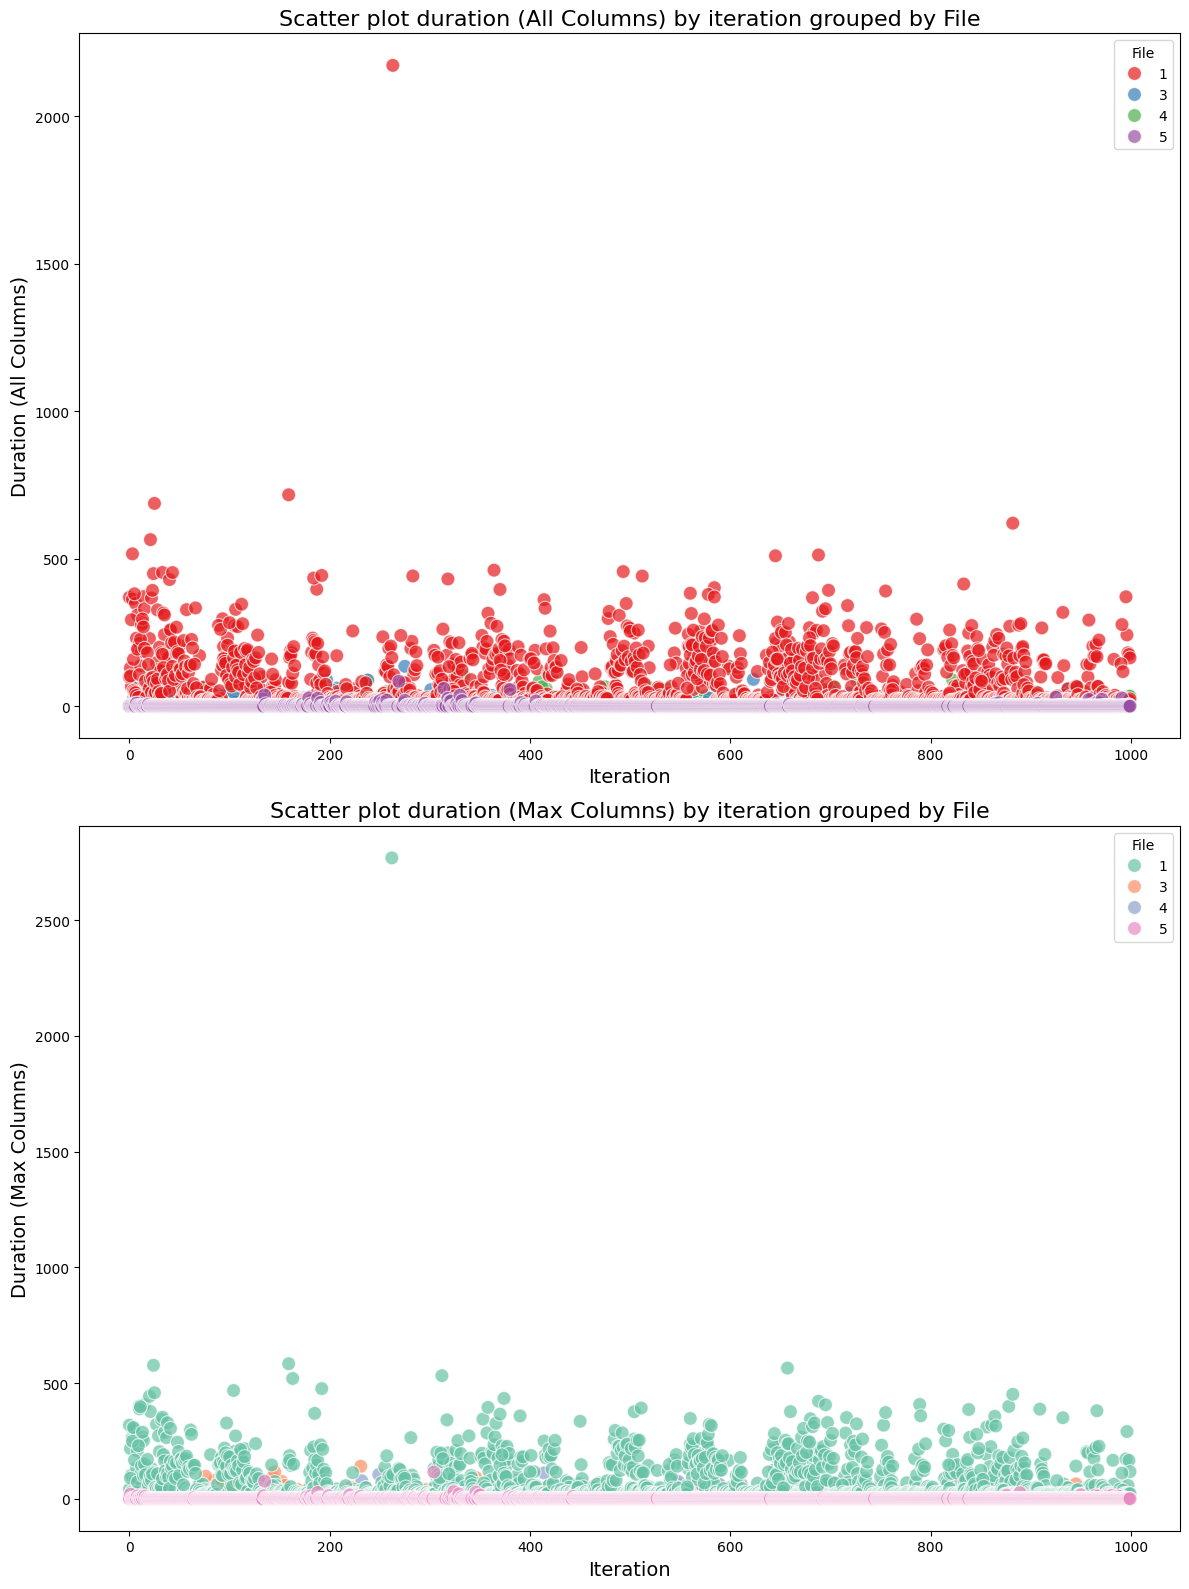

In [52]:
#2 rows 1 column
fig, ax = plt.subplots(2, 1, figsize=(12, 16))  

#scatter plot Duration_w_all_Columns
sns.scatterplot(data=df_appended, x='Iteration', y='Duration_w_all_Columns', hue='File', palette='Set1', s=100, alpha=0.7, ax=ax[0])
ax[0].set_title('Scatter plot duration (All Columns) by iteration grouped by File', fontsize=16)
ax[0].set_xlabel('Iteration', fontsize=14)
ax[0].set_ylabel('Duration (All Columns)', fontsize=14)

#scatter plot Duration_w_max_columns
sns.scatterplot(data=df_appended, x='Iteration', y='Duration_w_max_columns', hue='File', palette='Set2', s=100, alpha=0.7, ax=ax[1])
ax[1].set_title('Scatter plot duration (Max Columns) by iteration grouped by File', fontsize=16)
ax[1].set_xlabel('Iteration', fontsize=14)
ax[1].set_ylabel('Duration (Max Columns)', fontsize=14)

plt.legend(title='File')
plt.tight_layout()
plt.show()


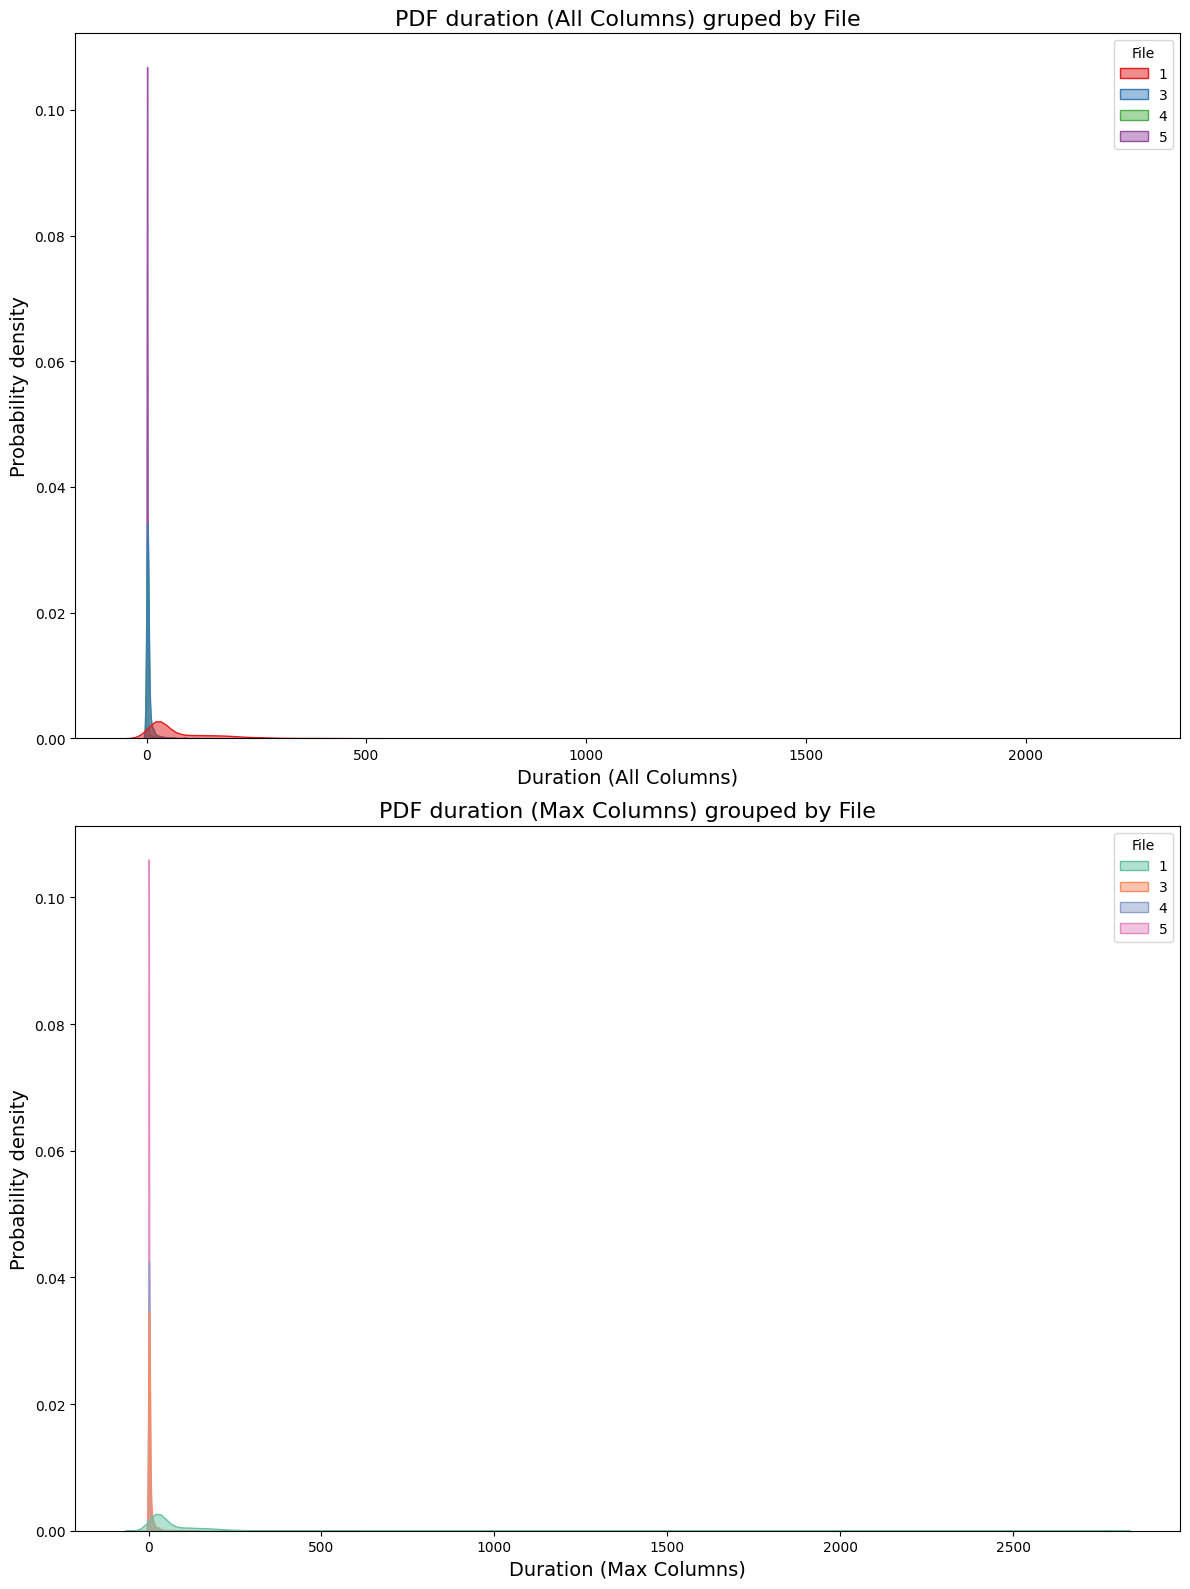

In [53]:
fig, ax = plt.subplots(2, 1, figsize=(12, 16)) 

#PDF Duration_w_all_Columns grouped by File
sns.kdeplot(data=df_appended, x='Duration_w_all_Columns', hue='File', fill=True, palette='Set1', alpha=0.5, ax=ax[0])
ax[0].set_title('PDF duration (All Columns) gruped by File', fontsize=16)
ax[0].set_xlabel('Duration (All Columns)', fontsize=14)
ax[0].set_ylabel('Probability density', fontsize=14)

#PDF Duration_w_max_columns grouped by File
sns.kdeplot(data=df_appended, x='Duration_w_max_columns', hue='File', fill=True, palette='Set2', alpha=0.5, ax=ax[1])
ax[1].set_title('PDF duration (Max Columns) grouped by File', fontsize=16)
ax[1].set_xlabel('Duration (Max Columns)', fontsize=14)
ax[1].set_ylabel('Probability density', fontsize=14)

plt.tight_layout()
plt.show()


     Round  Duration_w_all_Columns_3  Duration_w_all_Columns_4  \
0       53                  0.510846                  0.510496   
1       56                  0.643970                  0.523091   
2       57                  0.948215                  0.741871   
3       58                  0.485480                  0.381437   
4       59                  0.499438                  0.392053   
..     ...                       ...                       ...   
190    245                  6.380099                  3.508125   
191    246                  5.643203                  3.265441   
192    247                 12.788397                  8.410988   
193    248                  7.954056                  4.792009   
194    249                  7.504264                  4.287904   

     Duration_w_max_columns_3  Duration_w_max_columns_4  
0                    0.474126                  0.413802  
1                    0.685867                  0.535652  
2                    1.003906    

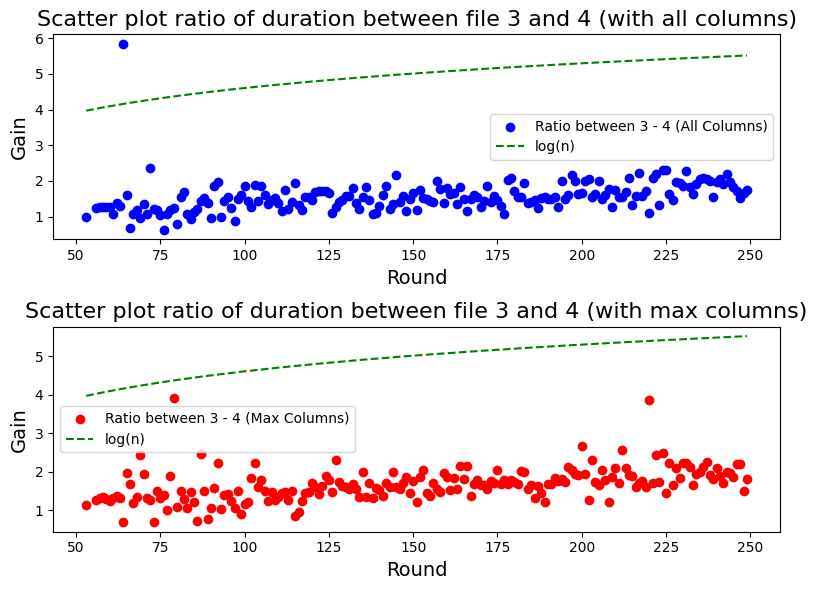

In [54]:
#there compute the mean with max and all columns grouped by round and file. Unstack: breaking down column "#file" into 
#4 columns (mean file 3 all columns.... mean file 4 max columns).
#reset_index returns the "Round" column as a normal column and not as an index
grouped_means = df7.groupby(['Round', 'File'])[['Duration_w_all_Columns', 'Duration_w_max_columns']].mean().unstack().reset_index()
grouped_means.columns = ['Round', 'Duration_w_all_Columns_3', 'Duration_w_all_Columns_4', 
                         'Duration_w_max_columns_3', 'Duration_w_max_columns_4']

print(grouped_means)
grouped_means['ratio_3_4_all_columns'] = grouped_means['Duration_w_all_Columns_3']/grouped_means['Duration_w_all_Columns_4']
grouped_means['ratio_3_4_max_columns'] = grouped_means['Duration_w_max_columns_3']/grouped_means['Duration_w_max_columns_4']

X_all = grouped_means['Round'].values
y_all = grouped_means['ratio_3_4_all_columns'].values

X_max = grouped_means['Round'].values
y_max = grouped_means['ratio_3_4_max_columns'].values

complex_curve_file3 = X_all**2 * np.log(X_all)
complex_curve_file4 = X_all**2
#complex curve with max columns is similar
log_curve_all = np.log(X_all)
log_curve_max = np.log(X_max)

fig, ax = plt.subplots(2, 1, figsize=(8, 6)) 

ax[0].scatter(X_all, y_all, color='b', label='Ratio between 3 - 4 (All Columns)')
ax[0].plot(X_all, log_curve_all, color='g', linestyle='--', label=r'log(n)')
ax[0].set_title('Scatter plot ratio of duration between file 3 and 4 (with all columns)', fontsize=16)
ax[0].set_xlabel('Round', fontsize=14)
ax[0].set_ylabel('Gain', fontsize=14)
ax[0].legend()


ax[1].scatter(X_max, y_max, color='r', label='Ratio between 3 - 4 (Max Columns)')
ax[1].plot(X_max, log_curve_max, color='g', linestyle='--', label=r'log(n)')
ax[1].set_title('Scatter plot ratio of duration between file 3 and 4 (with max columns)', fontsize=16)
ax[1].set_xlabel('Round', fontsize=14)
ax[1].set_ylabel('Gain', fontsize=14)
ax[1].legend()

plt.tight_layout()
plt.show()
